In [53]:
import numpy as np
import pandas as pd
#import pandas_profiling as pp
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

# models
from sklearn.linear_model import LogisticRegression, LogisticRegression, Perceptron, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#import xgboost as xgb
#from xgboost import XGBClassifier
#import lightgbm as lgb
#from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

In [65]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("train.csv")
df = pd.concat([train_df,test_df], ignore_index= True , sort=False)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
df['Title'] = df.Name.str.split(',').str[1].str.split('.').str[0].str.strip()
df['IsWomanOrBoy'] = ((df.Title == 'Master') | (df.Sex == 'female'))
df['LastName'] = df.Name.str.split(',').str[0]
family = df.groupby(df.LastName).Survived
df['WomanOrBoyCount'] = family.transform(lambda s: s[df.IsWomanOrBoy].fillna("0").count())

df['WomanOrBoyCount'] = df.mask(df.IsWomanOrBoy, df.WomanOrBoyCount - 1, axis=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsWomanOrBoy,LastName,WomanOrBoyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,Braund,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,True,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True,Futrelle,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False,Allen,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,False,Montvila,887
1778,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,True,Graham,3
1779,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,True,Johnston,1
1780,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,False,Behr,890


##  Analyze data

### Describe data

    look at columns
    check shape
    check null columns
    draw plot graphic to look at nullable data
    create describing list
    create heatmap



In [55]:
print('column:', data.columns)
print('shape:',data.shape)

column: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
shape: (1782, 12)


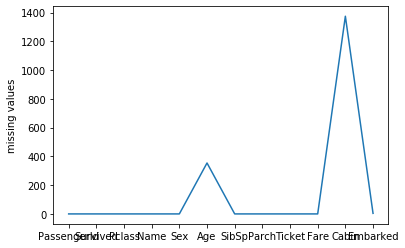

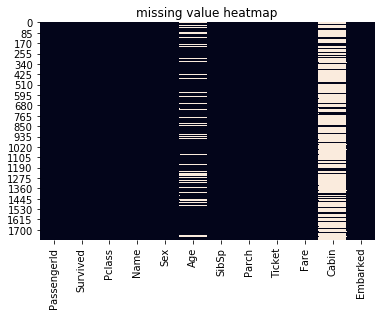

In [14]:
data.isnull().sum()

plt.ylabel('missing values')
plt.plot(pd.DataFrame(data.isnull().sum()))
plt.show()
sns.heatmap(data.isnull(),cbar= False).set_title('missing value heatmap')
plt.show()


## Feature Engineering

### Categorical:

    Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
    Numerical: Age, Fare. Discrete: SibSp, Parch.
    Nullable: Survived, Age, Cabin, Embarked




PClass

Description


In [36]:
Pclass_1 =round((train_df[train_df.Pclass==1].Survived==1).value_counts()[1]/ len(train_df[train_df.Pclass==1])*100,2)
Pclass_2 =round((train_df[train_df.Pclass==2].Survived==1).value_counts()[1]/ len(train_df[train_df.Pclass==2])*100,2)
Pclass_3 = round((train_df[train_df.Pclass==3].Survived==1).value_counts()[1]/ len(train_df[train_df.Pclass==3])*100,2)
Pclassdf = pd.DataFrame({
    'survive':{'class1' : Pclass_1,
               'class2' : Pclass_2,
               'class3' : Pclass_3
              } ,
    'notsurvive':{'class1' :100 - Pclass_1,
               'class2' : 100 - Pclass_2,
               'class3' : 100 - Pclass_3
              }
              })

Text(0.5, 1.0, 'survive vs Pclass')

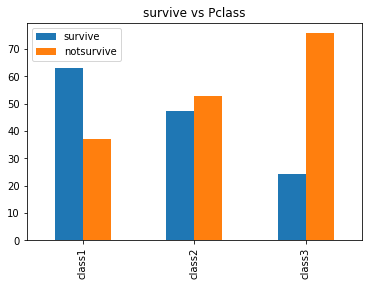

In [41]:
Pclassdf.plot.bar().set_title('survive vs Pclass')

In [46]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index = False ).mean().sort_values(by = 'Survived' , ascending= False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363
